# Monte Carlo Method

__Background:__ The <i>Monte Carlo (MC) Method (Monte Carlo Simulation)</i> was first published in 1949 by  Nicholas Metropolis and  Stanislaw Ulam in the work "The Monte Carlo Method" in the <i>Journal of American Statistics Association</i>. The name Monte Carlo has its origins in the fact that Ulam had an uncle who regularly gambled at the Monte Carlo casino in Monaco. In fact, way before 1949 the method had already been extensively used as a secret project of the U.S. Defense Department during the so-called "Manhattan Project". 

The basic principle of the Monte Carlo Method is to implement on a computer the <b>Strong Law of Large Numbers (SLLN)</b>.

Load some packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Theorem 6.2: Check normal approximation of the CLT via simulation 

Let $S_n \sim \text{Bin}(n,p)$ be binomially distributed with parameters $n$ and sucess probability $p$.
Check the fact that

$$ S^*_n = \frac{S_n - \mathbb{E}[S_n]}{\sqrt{\text{Var}(S_n)}} = \sqrt{n} \cdot \frac{\bar{X}_n - \mu}{\hat{\sigma}_n}$$

is approximately standard normal distributed if $n$ is very large ($\hat{\sigma}_n$ denotes the <i>sample standard deviation</i> and $\bar X_n = S_n/n$ is the empricial mean).




We simulate the random variable $S^*_{10000}$ (with $n$=10000) $M$=5000 times and plot the histogram of the samples $S^*_{10000}$, along with the probability density function of $\mathcal{N}(0,1)$, to check this fact numerically! 

In [2]:
n = 10000
M = 5000

p = 0.5

sStarSamples = np.zeros(M)

for i in range(M):
    
    sample = np.random.binomial(1, p, size = n)
    
    sampleMean = np.sum(sample)/n 
    
    sampleVariance = np.sum((sample-sampleMean)**2)/(n-1)  
    
    sStarSamples[i] = (np.sqrt(n)*(sampleMean-p))/np.sqrt(sampleVariance)

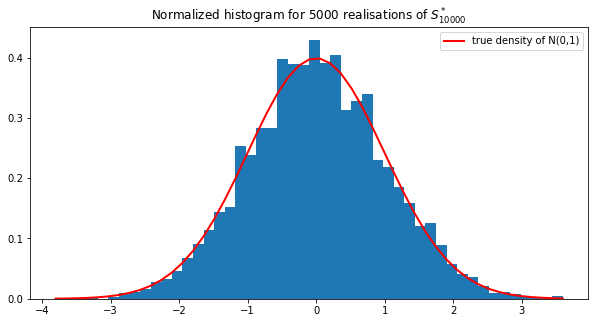

In [3]:
plt.figure(figsize=(10,5))

count, bins, patches = plt.hist(sStarSamples, bins='auto', density='True')

plt.title("Normalized histogram for 5000 realisations of $S^*_{10000}$")

plt.plot(bins, norm.pdf(bins,0,1), linewidth=2, color='r', label="true density of N(0,1)")

plt.legend()

#plt.savefig("histogram.pdf")
plt.show()

## Example 6.3 (Coin flips)

Define a sequence of i.i.d. random variables $X_1, X_2, \ldots$ such that

\begin{equation}
X_i = \begin{cases} 1 & \text{heads} \\ 0 & \text{tails} \end{cases} \qquad (i=1,2,\ldots)
\end{equation}

and $\mathbb{P}[X_i = 1] = p$. That is, $X_i$ is Bernoulli distributed with $\mathbb{E}[X_i] = \mathbb{P}[X_i = 1] = p$ for all $i=1,2,\ldots$.

Then by the __Strong Law of Large Numbers__ it holds that
\begin{equation}
\bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i \longrightarrow \mathbb{E}[X_1] = p \quad (n \rightarrow \infty)
\end{equation}




In [4]:
# Parameters
p = 0.5 
n = 10000

In [5]:
# Simulate the coin flips and compute the sample means

sampleMeanArray = np.zeros(n)

bernoulliSamples = np.random.binomial(1, p, size=n)
    
for i in range(n):

    samplesArray = bernoulliSamples[0:i+1]
        
    sampleMeanArray[i] = np.mean(samplesArray)

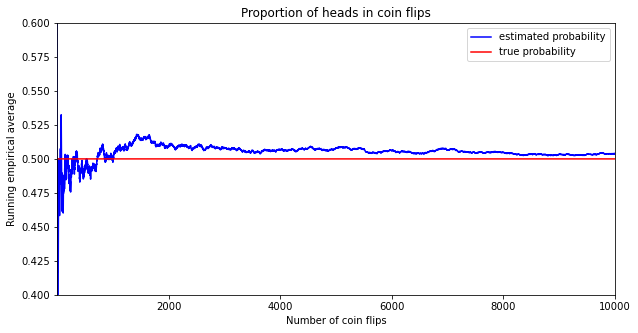

In [6]:
# Plot the sample means

plt.figure(figsize=(10,5))
plt.title("Proportion of heads in coin flips")

plt.plot(np.arange(1,n+1),sampleMeanArray,'-',color="blue",label="estimated probability") 
plt.plot(np.arange(1,n+1),p*np.ones(n),'-',color="red",label="true probability")

plt.xlabel("Number of coin flips")
plt.ylabel("Running empirical average")

plt.legend(loc = "best")

plt.ylim(0.4,0.6)
plt.xlim(1, n); 

#plt.savefig("coinflips.pdf")
plt.show()

## Example 6.3 (continued with 95% confidence interval)

In [7]:
n = 10000
quantile = 1.96

In [8]:
# Implement the MC Simulation and compute sample mean and sample variance

sampleMean = np.zeros(n-1)                                 # without sample n = 1   
sampleVariance = np.zeros(n-1)

lowerBound = np.zeros(n-1) 
upperBound = np.zeros(n-1)

bernoulliSamples = np.random.binomial(1, p, size=n)

for i in range(2,n+1):                                     # start with i = 2 (because of sample variance)
    
    sampleArray = bernoulliSamples[0:i]
    
    sampleMean[i-2] = np.sum(sampleArray)/(i) 
 
    sampleVariance[i-2] = np.sum((sampleArray-sampleMean[i-2])**2)/(i-1)
    
    # compute confidence interval
    lowerBound[i-2] = sampleMean[i-2] - quantile * np.sqrt(sampleVariance[i-2])/np.sqrt(i) 
    upperBound[i-2] = sampleMean[i-2] + quantile * np.sqrt(sampleVariance[i-2])/np.sqrt(i)

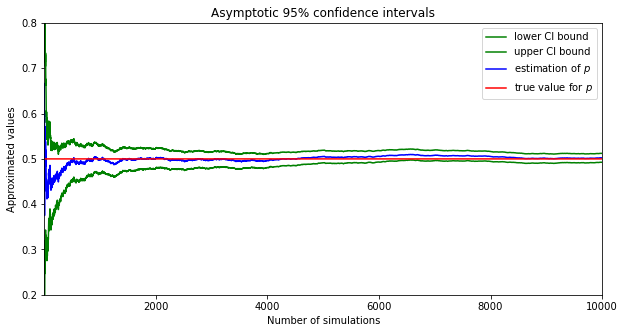

In [9]:
# Plot the estimator and the confidence intervals

plt.figure(figsize=(10,5))
plt.title("Asymptotic 95% confidence intervals")

plt.plot(np.arange(2,n+1),lowerBound,'-',color="green",label="lower CI bound") 
plt.plot(np.arange(2,n+1),upperBound,'-',color="green",label="upper CI bound")
plt.plot(np.arange(2,n+1),sampleMean,'-',color="blue",label="estimation of $p$")
plt.plot(np.arange(1,n+1),p*np.ones(n),'-',color="red",label="true value for $p$") 

plt.xlabel("Number of simulations")
plt.ylabel("Approximated values")
plt.legend(loc="upper right")

plt.xlim(2, n)
plt.ylim(0.2,0.8)

#plt.savefig("coinflips_CI.pdf")
plt.show()

## Example 6.4: Estimating $\pi$

The Monte Carlo Method is also typically used as a __probabilistic method__ to numerically compute an approximation of a quantity that is very hard or even impossible to compute exactly like, e.g., integrals (in particular, integrals in very high dimensions!).

Following is an implementation to estimate the irrational number  

$$ \pi = 3.1415926535897932384626433\ldots $$

based on the Monte Carlo Method. Specifically, recall that $\pi$ can be written in integral form as

$$ \pi = \int_0^1 4 \sqrt{1-x^2} dx = \mathbb{E}\left[4 \sqrt{1-U^2}\right]$$

where $U$ is uniformly distributed on [0,1].

Generate a sequence $U_1, U_2, \ldots, U_n$ of independent, on $[0,1]$ uniformly distributed random variables to perform your MC estimation. Re-use your samples $U_1, U_2, \ldots, U_n$ as you increase $n$! 


In [10]:
n = 1000

sampleMeanArray = np.zeros(n)

uniformSamples = np.random.uniform(0,1,size = n) 

for i in range(n):
    
    samplesArray = uniformSamples[0:i+1]
    
    sampleMeanArray[i] = np.mean(4 * np.sqrt(1-samplesArray**2))

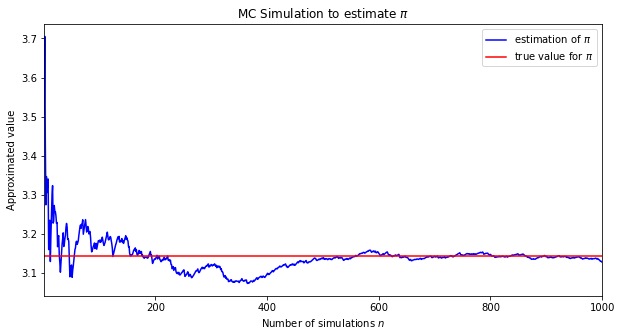

In [11]:
# Plot the approximation results

plt.figure(figsize=(10,5))
plt.title("MC Simulation to estimate $\pi$")

plt.plot(np.arange(1,n+1),sampleMeanArray,'-',color="blue",label="estimation of $\pi$") 
plt.plot(np.arange(1,n+1),np.pi*np.ones(n),'-',color="red",label="true value for $\pi$") 

plt.xlabel("Number of simulations $n$")
plt.ylabel("Approximated value")
plt.legend(loc="upper right")

plt.xlim(1, n)
#plt.ylim(2, 3.75)

#plt.savefig("estimate_pi.pdf")
plt.show()